In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import minimum_filter, maximum_filter
import copy

In [2]:
maze = ['s..', '##.', 'g..', '...']

print(len(maze)) # タテ
print(len(maze[0])) # ヨコ

print(maze)

4
3
['s..', '##.', 'g..', '...']


In [3]:
for i in range(len(maze)): # 左右の端に壁を作る
   maze[i] =  "#" + maze[i] + "#"

maze.insert(0, "#"*(len(maze[0]))) # 一番上に壁を設置
maze.insert(len(maze)+2, "#"*(len(maze[1]))) # 一番下に壁を設置

maze = [list(i) for i in maze]
maze_use =l2 = copy.deepcopy(maze)
maze_use

[['#', '#', '#', '#', '#'],
 ['#', 's', '.', '.', '#'],
 ['#', '#', '#', '.', '#'],
 ['#', 'g', '.', '.', '#'],
 ['#', '.', '.', '.', '#'],
 ['#', '#', '#', '#', '#']]

In [4]:
wall = '#'
goal = 'g'

In [5]:
def search_index(maze, char):
    for y_grid in range(len(maze)):
        for x_grid in range(len(maze[y_grid])):
            if maze[y_grid][x_grid] == char:
                break
        else:
            continue
        break
    return y_grid, x_grid # y, x

## 深さ優先探索

In [6]:
def solve(maze, y, x):
    if maze[y][x] == goal:
        return [(y, x)]
    maze[y][x] = wall
    for (next_y, next_x) in [(y+1, x), (y, x+1), (y, x-1), (y-1, x)]:
        if maze[next_y][next_x] == wall:
            continue
        route=solve(maze, next_y, next_x)
        if route:
            return [(y, x)] + route

In [7]:
start_index = search_index(maze_use, "s")

route = solve(maze_use, start_index[0], start_index[1])
route

[(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 2), (4, 1), (3, 1)]

## 飛車移動ができる場合のコストの算定

In [8]:
cost = 1

x_serial = 0
y_serial = 0

# print(route[0])
# print(route[1])

for i in range(2, len(route)):
    # print(route[i])

    if route[i-2][0] == route[i-1][0] and route[i-1][0] == route[i][0]:
        pass
    elif route[i-2][1] == route[i-1][1] and route[i-1][1] == route[i][1]:
        pass
    else:
        cost += 1

print(cost)

4


## 幅優先探索

In [9]:
#########################
# 前処理
#########################
#たてとよこ
h, w = len(maze), len(maze[0])
#コスト
cost = np.zeros((h, w), dtype=int) + 999
#コストが書き込まれて探索が終了したマス（bool）
done = np.zeros((h, w), dtype=bool)
#障害物（bool）
barrier = np.zeros((h, w), dtype=bool)

#プーリング用のフィルタ
g = np.array([[0, 1, 0],
              [1, 1, 1],
              [0, 1, 0]])

#mazeからスタート位置、ゴール位置、障害物位置を取得
for i in range(h):
    maze[i] = list(maze[i])
    for j in range(w):
        if maze[i][j] == 's':
            start = (i, j)
            cost[i, j] = 0
            done[i, j] = True
        if maze[i][j] == 'g':
            goal = (i, j)
        if maze[i][j] == '#':
            barrier[i, j] = True

print('start\n{}'.format(start))
print('goal\n{}'.format(goal))
print('cost\n{}'.format(cost))
print('done\n{}'.format(done))
print('barrier\n{}'.format(barrier))

start
(1, 1)
goal
(3, 1)
cost
[[999 999 999 999 999]
 [999   0 999 999 999]
 [999 999 999 999 999]
 [999 999 999 999 999]
 [999 999 999 999 999]
 [999 999 999 999 999]]
done
[[False False False False False]
 [False  True False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]
barrier
[[ True  True  True  True  True]
 [ True False False False  True]
 [ True  True  True False  True]
 [ True False False False  True]
 [ True False False False  True]
 [ True  True  True  True  True]]


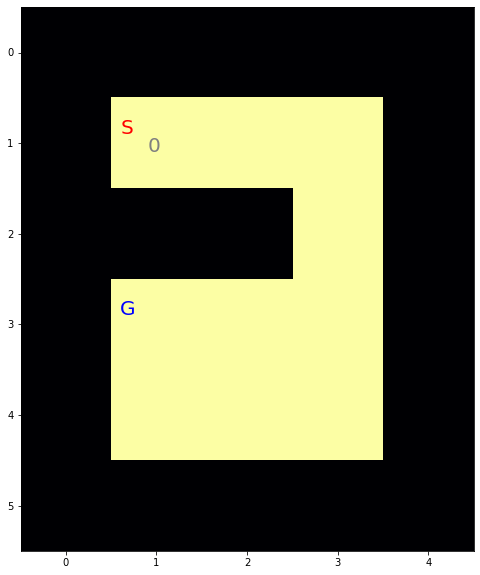

In [10]:
#########################
# 表示関数
#########################
def show(step):
    plt.figure(figsize=(10, 10))
    
    #フィールド、障害物の表示
    plt.imshow(barrier, cmap='inferno_r')
    #スタート、ゴールの記入
    plt.text(start[1]-0.4, start[0]-0.1, 'S', size = 20, color = 'r')
    plt.text(goal[1]-0.4, goal[0]-0.1, 'G', size = 20, color = 'b')
    #コストの記入
    x, y = np.where(cost != 999)
    c = cost[x, y]
    for i in range(len(x)):
        plt.text(y[i]-0.1, x[i]+0.1, c[i], size = 20, color = 'gray')
    
    #plt.savefig('save/{}.png'.format(step), bbox_inches='tight', pad_inches=0)
    plt.show(), plt.close(), print()
    
#表示
show(0)

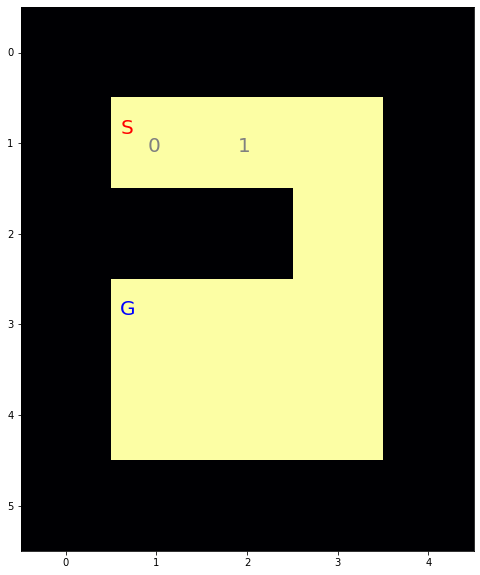

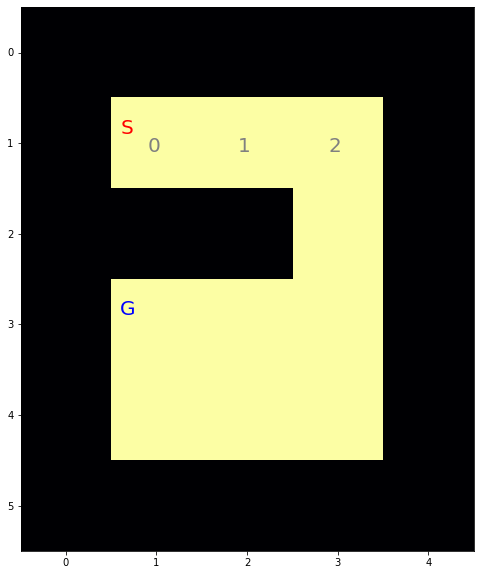

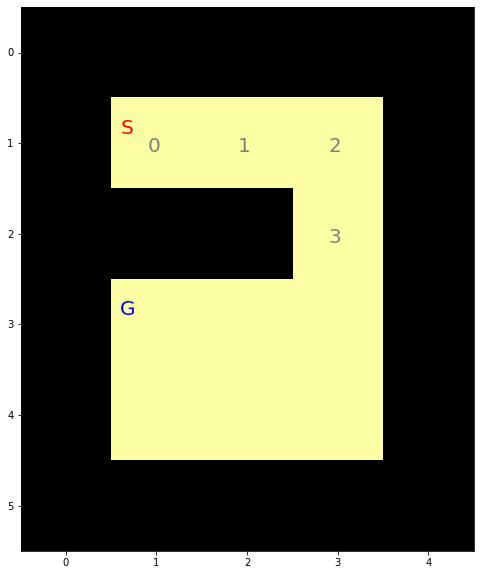

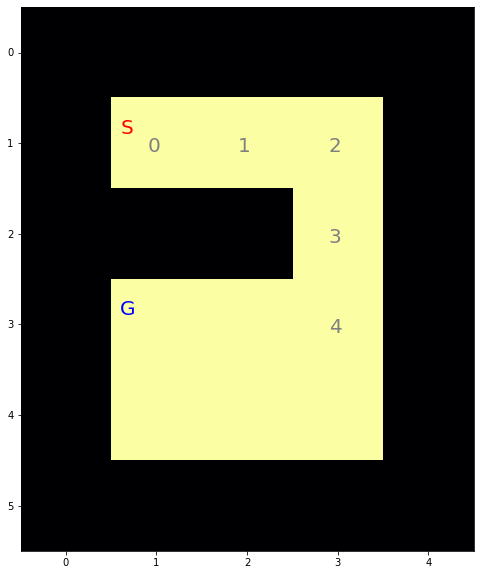

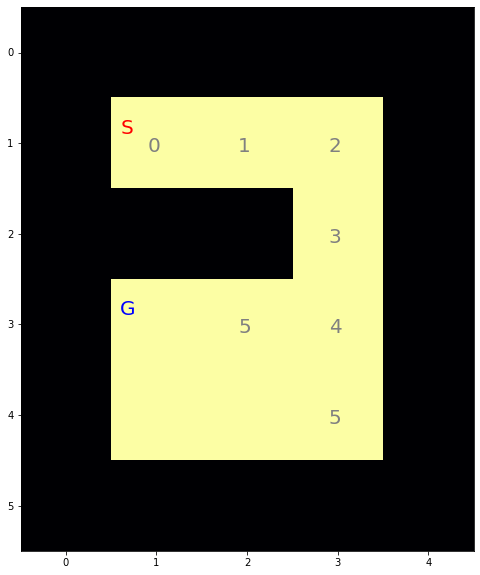

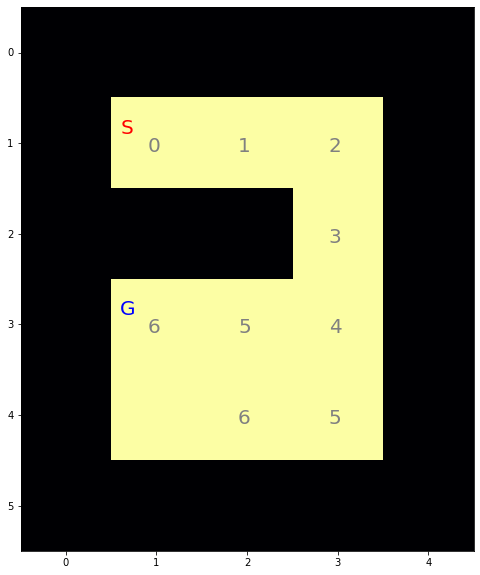

In [11]:
#########################
# 幅優先探索
#########################
for i in range(1, 999):

    #次に進出するマスのbool
    done_next = maximum_filter(done, footprint=g) * ~done
    #print('done_next\n{}'.format(done_next))
    
    #次に進出するマスのcost
    cost_next = minimum_filter(cost, footprint=g) * done_next
    cost_next[done_next] += 1
    #print('cost_next\n{}'.format(cost_next))
    
    #costを更新
    cost[done_next] = cost_next[done_next]
    #ただし障害物のコストは999とする
    cost[barrier] = 999
    #print('cost\n{}'.format(cost))
    
    #探索終了マスを更新
    done[done_next] = done_next[done_next]
    #ただし障害物は探索終了としない
    done[barrier] = False
    #print('done\n{}'.format(done))
    
    #表示
    show(i)
    
    #終了判定
    if done[goal[0], goal[1]] == True:
        break

In [12]:
#########################
# ゴールから逆順でルート計算
#########################
point_now = goal
cost_now = cost[goal[0], goal[1]]
route = [goal]

while cost_now > 0:
    #上から来た場合
    try:
        if cost[point_now[0] - 1, point_now[1]] == cost_now - 1:
            #更新
            point_now = (point_now[0] - 1, point_now[1])
            cost_now = cost_now - 1
            #記録
            route.append(point_now)
    except: pass
    #下から来た場合
    try:
        if cost[point_now[0] + 1, point_now[1]] == cost_now - 1:
            #更新
            point_now = (point_now[0] + 1, point_now[1])
            cost_now = cost_now - 1
            #記録
            route.append(point_now)
    except: pass
    #左から来た場合    
    try:
        if cost[point_now[0], point_now[1] - 1] == cost_now - 1:
            #更新
            point_now = (point_now[0], point_now[1] - 1)
            cost_now = cost_now - 1
            #記録
            route.append(point_now)
    except: pass
    #右から来た場合
    try:
        if cost[point_now[0], point_now[1] + 1] == cost_now - 1:
            #更新
            point_now = (point_now[0], point_now[1] + 1)
            cost_now = cost_now - 1
            #記録
            route.append(point_now)
    except: pass

#ルートを逆順にする
route = route[::-1]
print('route\n{}'.format(route))

route
[(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (3, 2), (3, 1)]


## 飛車移動ができる場合のコストの算定

In [13]:
cost = 1

x_serial = 0
y_serial = 0

# print(route[0])
# print(route[1])

for i in range(2, len(route)):
    # print(route[i])

    if route[i-2][0] == route[i-1][0] and route[i-1][0] == route[i][0]:
        pass
    elif route[i-2][1] == route[i-1][1] and route[i-1][1] == route[i][1]:
        pass
    else:
        cost += 1

print(cost)

3
